# ZNF462
[Weiss-Kruszka syndrome (WSKA)](https://omim.org/entry/618619) is caused by heterozygous mutation in the [ZNF462](https://omim.org/entry/617371) gene.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.4


### ZNF462
We used the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for ZNF462.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'ZNF462'
mane_tx_id = 'NM_021224.6'
mane_protein_id = 'NP_067047.4' # zinc finger protein 462 isoform 1
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.24") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 39/39 [00:11<00:00,  3.53 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
32,Ptosis
29,Global developmental delay
22,Broad philtrum
20,Highly arched eyebrow
19,Downslanted palpebral fissures
19,Exaggerated cupid's bow
18,Delayed speech and language development
17,Anteverted nares
17,Bulbous nose
16,Motor delay


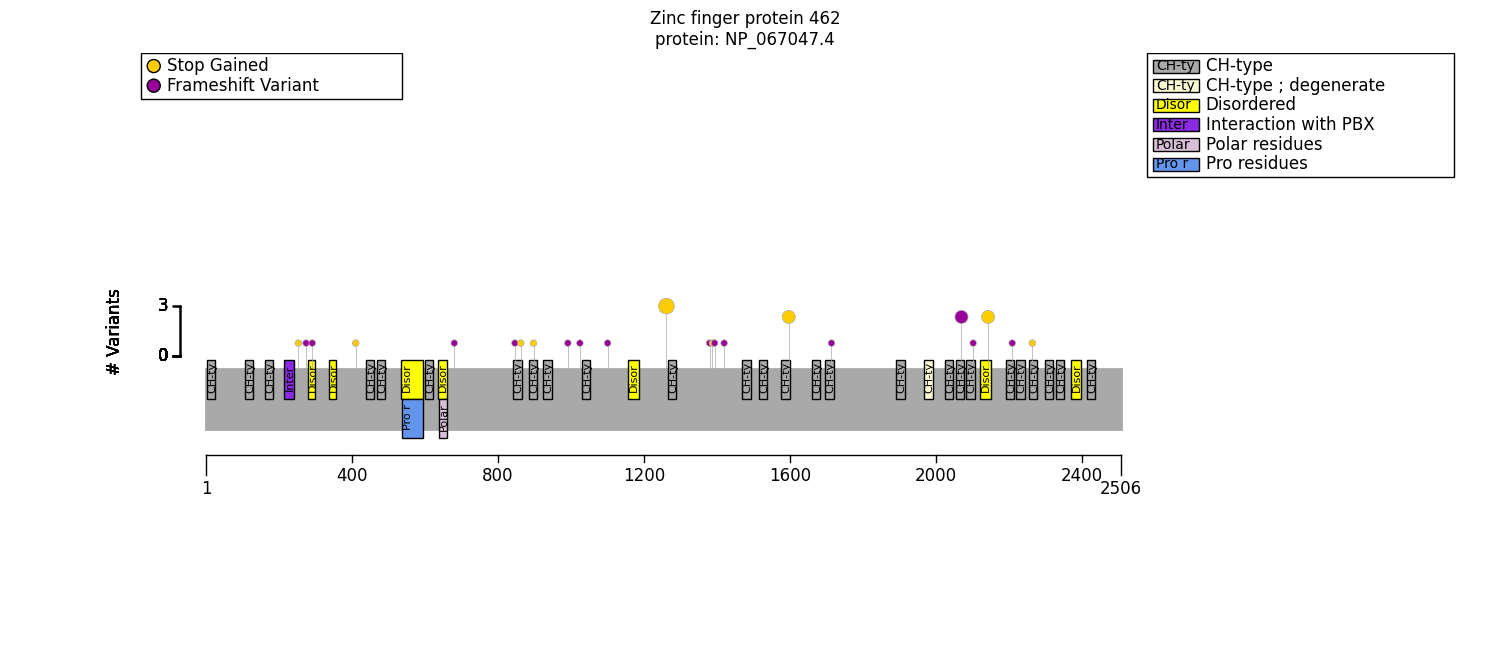

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

znf462_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
znf462_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis
All published variants belong to categories that are often considered to be loss of function (FRAMESHIFT_VARIANT, TRANSCRIPT_ABLATION, STOP_GAINED, SPLICE_ACCEPTOR_VARIANT). We will test transcript ablation and the most commonly reported variant.

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.view import MtcStatsViewer

ablation = variant_effect(VariantEffect.TRANSCRIPT_ABLATION, mane_tx_id)
abl_clf = monoallelic_classifier(
    a_predicate=ablation,
    b_predicate=~ablation,
    a_label="Ablation",
    b_label="Other"
)
abl_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=abl_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(abl_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,14
HMF03,Skipping term because of a child term with the same individual counts,8
HMF05,Skipping term because one genotype had zero observations,5
HMF08,Skipping general term,42
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,60


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=abl_result)

Allele group,Ablation,Other,Corrected p values,p values
Delayed speech and language development [HP:0000750],0/4 (0%),18/30 (60%),1.0,0.039244
Prominent metopic ridge [HP:0005487],0/4 (0%),14/31 (45%),1.0,0.133422
Hearing impairment [HP:0000365],3/5 (60%),7/29 (24%),1.0,0.138046
Low-set ears [HP:0000369],2/4 (50%),6/26 (23%),1.0,0.283525
Intellectual disability [HP:0001249],3/4 (75%),11/28 (39%),1.0,0.295133
Feeding difficulties [HP:0011968],1/6 (17%),13/28 (46%),1.0,0.363631
Exaggerated cupid's bow [HP:0002263],3/4 (75%),16/29 (55%),1.0,0.619721
Highly arched eyebrow [HP:0002553],2/5 (40%),18/31 (58%),1.0,0.637128
Broad philtrum [HP:0000289],5/7 (71%),17/30 (57%),1.0,0.676720
Epicanthus [HP:0000286],1/4 (25%),12/30 (40%),1.0,1.000000


In [9]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo, mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Delayed speech and language development [HP:0000750],2/9 (22%),16/25 (64%),0.996461,0.052280
Highly arched eyebrow [HP:0002553],8/10 (80%),11/25 (44%),0.996461,0.071176
Hearing impairment [HP:0000365],4/10 (40%),4/22 (18%),1.000000,0.218210
Feeding difficulties [HP:0011968],5/9 (56%),8/23 (35%),1.000000,0.426935
Hypotonia [HP:0001252],5/10 (50%),8/25 (32%),1.000000,0.443707
Motor delay [HP:0001270],3/9 (33%),13/25 (52%),1.000000,0.447871
Intellectual disability [HP:0001249],5/9 (56%),9/23 (39%),1.000000,0.453315
Anteverted nares [HP:0000463],5/9 (56%),10/25 (40%),1.000000,0.462029
Bulbous nose [HP:0000414],5/9 (56%),10/25 (40%),1.000000,0.462029
Global developmental delay [HP:0001263],6/9 (67%),20/25 (80%),1.000000,0.648847


# Summary

In [10]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

ft_results = (
    GPAnalysisResultSummary.from_multi(
        result=abl_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result
    ),
)

caption = """No statistically significant genotype phenotype association was identified."""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=ft_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [11]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
Ablation,Other,30,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,28,0


In [12]:
summarizer.process_latex(report=report, protein_fig=znf462_fig)

Figure saved to ../../supplement/img/ZNF462_protein_diagram-draft.pdf
Output to ../../supplement/tex/ZNF462_summary_draft.tex
